# **PyTorch Linear Regression**
---
---

### **Perform Standard Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch

## **Create a Tensor with Linearly spaced elements - X VALUE**

In [2]:
x = torch.linspace(1,50,50).reshape(-1,1)

In [3]:
x

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

### **Create a random Integer with ERROR VALUES - e**

In [4]:
torch.manual_seed(71)

e = torch.randint(-8,9, (50,1), dtype = torch.float)
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

### **Create Y values**

In [5]:
y = 2*x + e

In [6]:
y.shape

torch.Size([50, 1])

### **Plot X vs Y**

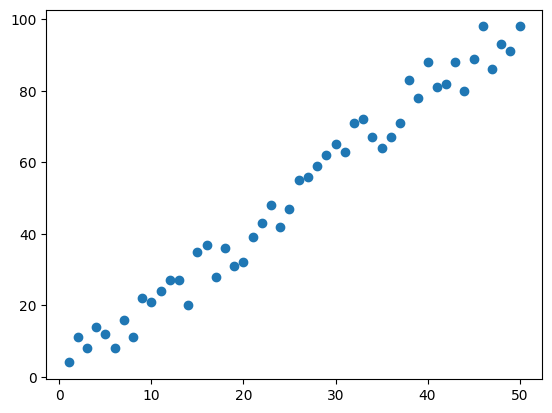

In [8]:
plt.scatter(x.numpy(), y.numpy())

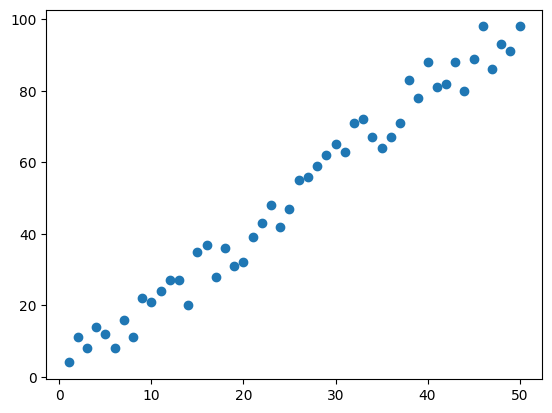

In [9]:
plt.scatter(x, y)

---
---
## **Sample Example : Create Simple Linear Model**

In [10]:
import torch.nn as nn

In [11]:
torch.manual_seed(59)

# Single Layer Linear Model
model = nn.Linear(in_features = 1, out_features = 1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


---
---
## **Create Model Class with Single Linear Layer**

In [12]:
class Model(nn.Module):

  def __init__(self, in_features, out_features):

    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

## Sample Example : Beahaviour Of our Model

In [13]:
# Initiate instances for our model

torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [14]:
# Check all Model Parameters

for name,param in model.named_parameters():
  print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


---
---
## **Plot Initial Model - Without Training**

In [15]:
x0 = torch.tensor([2.0])

print(model.forward(x))

tensor([[1.0698],
        [1.1758],
        [1.2817],
        [1.3877],
        [1.4937],
        [1.5997],
        [1.7056],
        [1.8116],
        [1.9176],
        [2.0236],
        [2.1296],
        [2.2355],
        [2.3415],
        [2.4475],
        [2.5535],
        [2.6594],
        [2.7654],
        [2.8714],
        [2.9774],
        [3.0834],
        [3.1893],
        [3.2953],
        [3.4013],
        [3.5073],
        [3.6132],
        [3.7192],
        [3.8252],
        [3.9312],
        [4.0372],
        [4.1431],
        [4.2491],
        [4.3551],
        [4.4611],
        [4.5671],
        [4.6730],
        [4.7790],
        [4.8850],
        [4.9910],
        [5.0969],
        [5.2029],
        [5.3089],
        [5.4149],
        [5.5209],
        [5.6268],
        [5.7328],
        [5.8388],
        [5.9448],
        [6.0507],
        [6.1567],
        [6.2627]], grad_fn=<AddmmBackward0>)


In [16]:
x1 = torch.linspace(0., 50., 50)
x1

tensor([ 0.0000,  1.0204,  2.0408,  3.0612,  4.0816,  5.1020,  6.1224,  7.1429,
         8.1633,  9.1837, 10.2041, 11.2245, 12.2449, 13.2653, 14.2857, 15.3061,
        16.3265, 17.3469, 18.3673, 19.3878, 20.4082, 21.4286, 22.4490, 23.4694,
        24.4898, 25.5102, 26.5306, 27.5510, 28.5714, 29.5918, 30.6122, 31.6327,
        32.6531, 33.6735, 34.6939, 35.7143, 36.7347, 37.7551, 38.7755, 39.7959,
        40.8163, 41.8367, 42.8571, 43.8776, 44.8980, 45.9184, 46.9388, 47.9592,
        48.9796, 50.0000])

In [17]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1
y1

tensor([0.9637, 1.0718, 1.1798, 1.2879, 1.3959, 1.5040, 1.6121, 1.7201, 1.8282,
        1.9363, 2.0443, 2.1524, 2.2604, 2.3685, 2.4766, 2.5846, 2.6927, 2.8007,
        2.9088, 3.0169, 3.1249, 3.2330, 3.3410, 3.4491, 3.5572, 3.6652, 3.7733,
        3.8814, 3.9894, 4.0975, 4.2055, 4.3136, 4.4217, 4.5297, 4.6378, 4.7458,
        4.8539, 4.9620, 5.0700, 5.1781, 5.2861, 5.3942, 5.5023, 5.6103, 5.7184,
        5.8265, 5.9345, 6.0426, 6.1506, 6.2587])

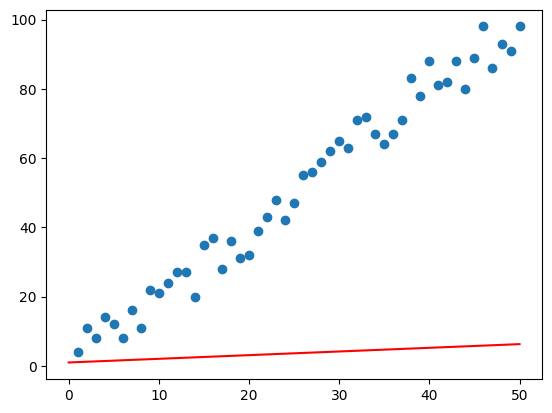

In [18]:
#Real Values from Numpy
plt.scatter(x.numpy(), y.numpy())

# Predicted Values from Model
plt.plot(x1, y1,'r')

## **Do Training**

### **Set Loss Function**

In [24]:
criterion = nn.MSELoss()

## **Set The Optimization**

In [20]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

## **Train Model**

In [21]:
# Training our Model

epochs = 50
losses = []


for i in range(epochs):

  i = i+1

  # PREDICTING ON THE FORWARD PASS
  y_pred = model.forward(x)

  # CALCULATE OUR LOSS
  loss = criterion(y_pred, y)

  # RECORD THAT LOSS
  losses.append(loss)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  print(f"Epoch {i} '\t' loss : {loss.item()} '\t' weight : {model.linear.weight.item()} '\t' bias : {model.linear.bias.item()} ")

Epoch 1 '	' loss : 2961.54931640625 '	' weight : 3.283900260925293 '	' bias : 1.0584636926651 
Epoch 2 '	' loss : 1538.9046630859375 '	' weight : 1.0005019903182983 '	' bias : 0.9908678531646729 
Epoch 3 '	' loss : 804.4437255859375 '	' weight : 2.641145944595337 '	' bias : 1.039860486984253 
Epoch 4 '	' loss : 425.2681884765625 '	' weight : 1.4623053073883057 '	' bias : 1.005082368850708 
Epoch 5 '	' loss : 229.51327514648438 '	' weight : 2.3093080520629883 '	' bias : 1.0304946899414062 
Epoch 6 '	' loss : 128.4519500732422 '	' weight : 1.7007108926773071 '	' bias : 1.012658953666687 
Epoch 7 '	' loss : 76.27752685546875 '	' weight : 2.1379847526550293 '	' bias : 1.0258973836898804 
Epoch 8 '	' loss : 49.341678619384766 '	' weight : 1.823784351348877 '	' bias : 1.0168083906173706 
Epoch 9 '	' loss : 35.435611724853516 '	' weight : 2.049529552459717 '	' bias : 1.0237617492675781 
Epoch 10 '	' loss : 28.256433486938477 '	' weight : 1.8873153924942017 '	' bias : 1.0191881656646729 
Epoch

## **Plot The Result**

In [22]:
x_test = np.linspace(0., 50., 50)

current_Weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

y_predicted = current_Weight*x_test + current_bias

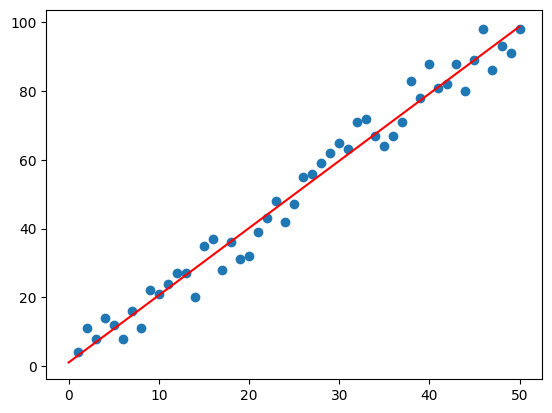

In [23]:
#Real Values from Numpy
plt.scatter(x.numpy(), y.numpy())

# Predicted Values from Model
plt.plot(x_test, y_predicted,'r')